In [12]:
import pandas as pd

rating_cols = ['user_id', 'anime_id', 'rating']
ratings = pd.read_csv('/Users/brangmai/Desktop/Capstone/modified_data/rating.csv', names=rating_cols, usecols=range(3), encoding="ISO-8859-1")
ratings = ratings[1:]


anime_cols = ['anime_id', 'name', 'genre']
anime = pd.read_csv('/Users/brangmai/Desktop/Capstone/modified_data/anime.csv', names=anime_cols, usecols=range(3), encoding="ISO-8859-1")
anime = anime[1:]

/Users/brangmai/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In order to find the most rated anime, anime file and user rating files are combined

In [14]:
anime_ratings = pd.merge(anime, ratings)
anime_ratings.tail() 

,anime_id,name,genre,user_id,rating
262138,986,Dragon Ball Z Special 1: Tatta Hitori no Saish...,"Adventure, Comedy, Fantasy, Sci-Fi, Shounen",3210,9
262139,986,Dragon Ball Z Special 1: Tatta Hitori no Saish...,"Adventure, Comedy, Fantasy, Sci-Fi, Shounen",3215,8
262140,986,Dragon Ball Z Special 1: Tatta Hitori no Saish...,"Adventure, Comedy, Fantasy, Sci-Fi, Shounen",3267,10
262141,986,Dragon Ball Z Special 1: Tatta Hitori no Saish...,"Adventure, Comedy, Fantasy, Sci-Fi, Shounen",3313,8
262142,9970,Floating Material,Hentai,2165,7


Group by anime names to get rating counts

In [31]:
combine_anime_ratings = anime_ratings.dropna(axis=0, subset = ['name'])
anime_rating_count = (combine_anime_ratings.groupby(by=['name'])['rating'].count().reset_index().rename(columns = {'rating': 'total_rating'})[['name', 'total_rating']])
anime_rating_count = anime_rating_count.sort_values('total_rating', ascending=False)
anime_rating_count.head(10)

,name,total_rating
4876,Shingeki no Kyojin,1640
5175,Sword Art Online,1630
1099,Death Note,1521
240,Angel Beats!,1226
3498,Mirai Nikki (TV),1162
1539,Fullmetal Alchemist: Brotherhood,1106
1395,Elfen Lied,1015
291,Ao no Exorcist,1009
917,Code Geass: Hangyaku no Lelouch,1009
3731,Naruto,1005


In [32]:
combine_anime_rating = anime.dropna(axis=0, subset = ['name'])
anime_rating_count = (combine_anime_ratings.groupby(by=['name'])['rating'].count().reset_index().rename(columns = {'rating': 'total_rating'})[['name', 'total_rating']])
anime_rating_count = anime_rating_count.sort_values('total_rating', ascending=False)
anime_rating_count.head(10)

,name,total_rating
4876,Shingeki no Kyojin,1640
5175,Sword Art Online,1630
1099,Death Note,1521
240,Angel Beats!,1226
3498,Mirai Nikki (TV),1162
1539,Fullmetal Alchemist: Brotherhood,1106
1395,Elfen Lied,1015
291,Ao no Exorcist,1009
917,Code Geass: Hangyaku no Lelouch,1009
3731,Naruto,1005


In [27]:
print(ratings.shape)
print(ratings.columns)
ratings.head()

(854113, 3)
Index(['user_id', 'anime_id', 'rating'], dtype='object')


,user_id,anime_id,rating
1,1,8074,10
2,1,11617,10
3,1,11757,10
4,1,15451,10
5,2,11771,10


In [3]:
anime_genre = anime['genre'].values.tolist()
genre = set()
for gen in anime_genre:
    for g in gen:
        genre.add(g)
for gen in genre:
    print(gen)

TypeError: 'float' object is not iterable

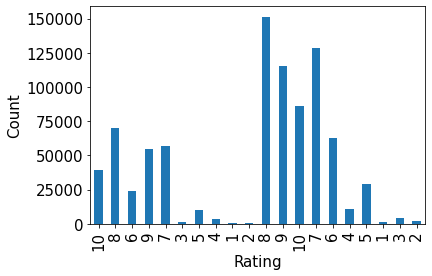

In [4]:

import matplotlib.pyplot as plt

plt.rc("font", size=15)
ratings.rating.value_counts(sort=False).plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [5]:
print(anime.shape)
print(list(anime.columns))
anime.head()

(12294, 3)
['anime_id', 'name', 'genre']


,anime_id,name,genre
1,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
2,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space"
3,6,Trigun,"Action, Comedy, Sci-Fi"
4,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna..."
5,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural"


In [6]:
rating_count = pd.DataFrame(ratings.groupby('anime_id')['rating'].count())
rating_count.sort_values('rating', ascending=False).head()

,rating
anime_id,
1535,3243
1575,2384
226,2232
121,2199
2904,2110


In [7]:
# anime_ratings.describe()

# anime_ratings.loc[anime_ratings['genre'] == 'Hentai'].head(10)

anime_ratings = anime_ratings.pivot_table(index=['user_id'], columns=['name'], values='rating')

anime_ratings.tail()

name,"""Bungaku Shoujo"" Memoire","""Bungaku Shoujo"" Movie",.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,.hack//Quantum: Sore ike! Bokura no Chimuchimu-chan!!,...,x/1999,x2: Double x,xenosaga The Animation,xi Avant,xiao Qian,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
bokunopico_ratings = anime_ratings['Boku no Pico']
bokunopico_ratings.head()

user_id
1      NaN
10     NaN
100    NaN
1000   NaN
1001   NaN
Name: Boku no Pico, dtype: float64

In [9]:
similar_anime = anime_ratings.corrwith(bokunopico_ratings)
similar_anime = similar_anime.dropna()
df = pd.DataFrame(similar_anime)
df.head(10)

/Users/brangmai/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/brangmai/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,0
name,
"""Bungaku Shoujo"" Movie",-0.388379
.hack//G.U. Returner,1.000000
.hack//Gift,1.000000
.hack//Liminality,1.000000
.hack//Quantum,-0.866025
.hack//Sign,-0.453921
07-Ghost,-0.244503
11eyes,0.037764
11eyes: Momoiro Genmutan,-0.064948


In [10]:
similar_anime.sort_values(ascending=False)

name
Koi Kaze                                                    1.0
Bakemonogatari Recap                                        1.0
Memories                                                    1.0
Marginal Prince: Gekkeiju no Ouji-tachi                     1.0
Mahou Shoujo Lyrical Nanoha: The Movie 2nd A s              1.0
                                                           ... 
Nogizaka Haruka no Himitsu: Purezza                        -1.0
Nurarihyon no Mago OVA                                     -1.0
One Piece Movie 4: Dead End no Bouken                      -1.0
One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima   -1.0
B-Densetsu! Battle Bedaman                                 -1.0
Length: 1613, dtype: float64

In [11]:
import numpy as np

anime_stats = anime_ratings.groupby('anime_id').agg({'genre'})
anime_stats.head()

KeyError: 'anime_id'